In [1]:
%load_ext nb_black
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [7]:
from util.data import load_mnist, encode_data
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

import numpy as np
import seaborn as sns
from tqdm.notebook import tqdm
import pandas as pd

from algorithms import SpatialPooler

<IPython.core.display.Javascript object>

In [4]:
(x_train, y_train), (x_test, y_test) = load_mnist()
x_train, x_test = encode_data(x_train, x_test)

reshape = lambda x: x.reshape((x.shape[0], x.shape[1] ** 2))

x_train_flattened, x_test_flattened = reshape(x_train), reshape(x_test)

<IPython.core.display.Javascript object>

In [5]:
clf_pure = MultinomialNB()
clf_pure.fit(x_train_flattened, y_train)
clf_pure.score(x_test_flattened, y_test)

0.8184

<IPython.core.display.Javascript object>

In [17]:
sp = SpatialPooler(
    input_dimension=x_test[0].shape,
    column_dimension=(45, 45),
    connection_sparsity=0.7,
    permanence_threshold=0.5,
    stimulus_threshold=10,
    permanence_increment=0.1,
    permanence_decrement=0.02,
    column_sparsity=0.02,
    potential_pool_radius=8,
    boost_strength=10,
)
sp.load_state("data/12-03-2022_22-58-09/sp.pkl")

<IPython.core.display.Javascript object>

In [20]:
"""
winning_columns_train = np.zeros([x_train.shape[0], sp.number_of_active_columns])
sdrs_train = np.zeros([x_train.shape[0], sp.number_of_columns])

for idx, sample in enumerate(tqdm(x_train_flattened)):
    wc = sp.compute(sample, learn=False)
    sdr = sp.top_columns_to_sdr(wc)
    winning_columns_train[idx] = wc
    sdrs_train[idx] = sdr
"""
clf_sdr = MultinomialNB()
clf_sdr.fit(sdrs_train, y_train)

winning_columns_test = np.zeros([x_test.shape[0], sp.number_of_active_columns])
sdrs_test = np.zeros([x_test.shape[0], sp.number_of_columns])

for idx, sample in enumerate(tqdm(x_test_flattened)):
    wc = sp.compute(sample, learn=False)
    sdr = sp.top_columns_to_sdr(wc)
    winning_columns_test[idx] = wc
    sdrs_test[idx] = sdr

clf_sdr.score(sdrs_test, y_test)

  0%|          | 0/10000 [00:00<?, ?it/s]

0.7594

<IPython.core.display.Javascript object>

In [21]:
parameters = {"C": [0.1, 0.5, 0.7, 1.0], "penalty": ["none", "l1", "l2"]}
lr = LogisticRegression()

clf = GridSearchCV(lr, parameters, n_jobs=-1)
clf.fit(sdrs_test, y_test)
clf.best_score_

/home/shrank/.pyenv/versions/3.10.0/envs/bachelor-thesis-research/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/shrank/.pyenv/versions/3.10.0/envs/bachelor-thesis-research/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/shrank/.pyenv/versions/3.10.0/envs/bachelor-thesis-research/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/shrank/.pyenv/versions/3.10.0/envs/bachelor-thesis-research/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/shrank/.pyenv/versions/3.10.0/envs/bachelor-thesis-research/lib/python3.10

/home/shrank/.pyenv/versions/3.10.0/envs/bachelor-thesis-research/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/shrank/.pyenv/versions/3.10.0/envs/bachelor-thesis-research/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative sol

/home/shrank/.pyenv/versions/3.10.0/envs/bachelor-thesis-research/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/shrank/.pyenv/versions/3.10.0/envs/bachelor-thesis-research/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative sol

0.867

<IPython.core.display.Javascript object>

In [22]:
lr = LogisticRegression()
lr.fit(x_train_flattened, y_train)
lr.score(x_test_flattened, y_test)

/home/shrank/.pyenv/versions/3.10.0/envs/bachelor-thesis-research/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.918

<IPython.core.display.Javascript object>

In [14]:
from util.metrics import calc_noise_robustness, calculate_overlap
from util.plots import plot_images
from util.data import add_noise

<IPython.core.display.Javascript object>

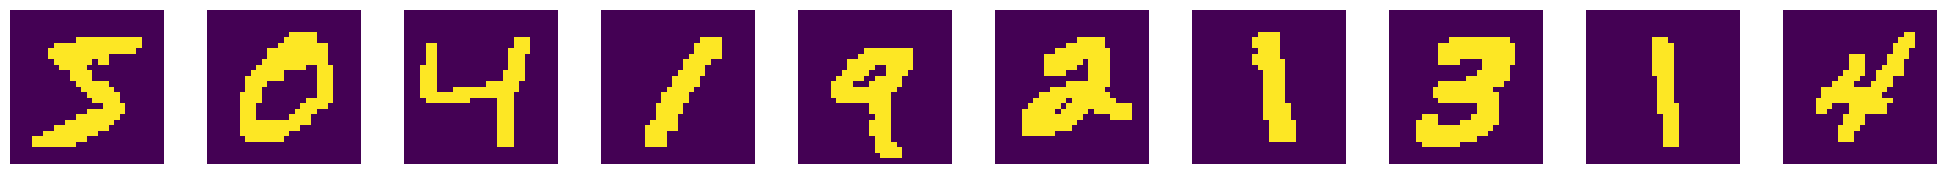

<IPython.core.display.Javascript object>

In [12]:
plot_images(x_train[:10])

In [17]:
sdrs = np.zeros((5, sp.number_of_columns), dtype=int)

for idx, input_vector in enumerate(x_train[:5]):
    winning_columns = sp.compute(input_vector, learn=False)
    sdr = sp.top_columns_to_sdr(winning_columns)

    sdrs[idx, :] = sdr

<IPython.core.display.Javascript object>

In [48]:
test_sdr = sdrs[0]
no_one_bits = test_sdr.sum()

overlap_frac = []

noise = [noise / 100 for noise in range(1, 100)]

for noise_level in noise:
    noisy_input = add_noise(x_train[0], noise_level)
    noisy_winning_columns = sp.compute(noisy_input, learn=False)
    noisy_sdr = sp.top_columns_to_sdr(noisy_winning_columns)

    overlap = calculate_overlap(test_sdr, noisy_sdr)

    frac = overlap / no_one_bits

    overlap_frac.append(frac)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='noise', ylabel='overlap'>

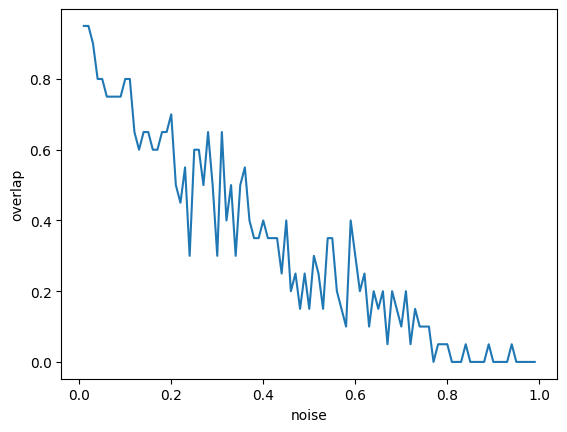

<IPython.core.display.Javascript object>

In [63]:
df = pd.DataFrame(data={"overlap": overlap_frac, "noise": noise})
sns.lineplot(data=df, y="overlap", x="noise")